## Практическая работа

В этой работе вам нужно будет подготовить финальный нотбук по задаче предсказания стоимости поддержанного автомобиля, которую мы решали на протяжении нескольких модулей. 
<br>
*Обязательные задачи* помогут проверить, что вы действительно усвоили материал. Если у вас всё получилось, можете переходить к следующей теме.
<br>
Удачи!

Цели практической работы: 

1.   Потренироваться в формировании понятного и структурированного ноутбука по результатам исследования.
2.   Отработать выбор наилучшей предсказательной модели с помощью кросс-валидации. 
3.   На основе результатов метрик научиться делать выводы о переобучении/недообучении модели.
4.   Научиться сохранять обученные модели в формате `pickle`.




Что оценивается:

*   Ноутбук состоит из блоков: каждый блок соответствует определённой фазе работы с задачей.
*   Блоки, которые состоят из нескольких этапов, декомпозированы на подблоки (например, в `Data Preparation` может быть несколько подблоков: `Data cleaning`, `Feature Selection` и тому подобное).
*   Код написан в едином стиле и не нарушает PEP-8.
*   Код покрыт комментариями.
*   Код воспроизводим (то есть проверяющий, запустив ноутбук, получит ровно такие же результаты).
*   Все условия задач выполнены.





## Обязательные задачи

### Постановка общей задачи:



Напомним, что вы работаете с небольшой выборкой из коллекции подержанных автомобилей, выставленных на продажу в Соединённых Штатах. На этих данных вам нужно построить модель классификации, определяющую категорию цены подержанного автомобиля в зависимости от характеристик транспортного средства.

### Описание датасета:



- `id`: идентификатор записи;
- `url`: URL записи о продаже;
- `region`: регион;
- `region_url`: URL региона;
- `price`: стоимость;
- `year`: год выпуска;
- `manufacturer`: производитель;
- `model`: модель;
- `condition`: состояние;
- `cylinders`: количество цилиндров;
- `fuel`: тип топлива;
- `odometer`: количество пройденных миль;
- `title_status`: статус;
- `transmission`: коробка передач;
- `VIN`: идентификационный номер;
- `drive`: тип привода;
- `size`: размер;
- `type`: кузов;
- `paint_color`: цвет;
- `image_url`: URL изображения;
- `description`: указанное описание;
- `county`: страна;
- `state`: штат;
- `lat`: широта;
- `long`: долгота;
- `posting_date`: дата размещения объявления о продаже;
- `price_category`: категория цены.

###  Задачи:

Ниже представлены задачи по проекту построения модели. Выполните их и в отдельном файле соберите финальный ноутбук проекта. 

0. *Импорт сторонних библиотек*

В первой ячейке ноутбука импортируйте библиотеки, которые необходимы для работы с данными. Впоследствии все импорты добавляйте в эту ячейку. Структурируйте их по PEP-8. 

[Документация по оформлению import'ов (PEP-8)](https://peps.python.org/pep-0008/#imports)

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pickle

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

1. *Загрузка данных*

Загрузите данные из файла `df_out`. Выведите размерность и первые 5 строчек данных.

In [2]:
df = pd.read_csv('data/df_out.csv')
df.head()

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,image_url,description,state,lat,long,posting_date,price_category,date
0,7308295377,https://chattanooga.craigslist.org/ctd/d/chatt...,chattanooga,https://chattanooga.craigslist.org,54990,2020.0,ram,2500 crew cab big horn,diesel,27442,clean,other,https://images.craigslist.org/00N0N_1xMPvfxRAI...,Carvana is the safer way to buy a car During t...,tn,35.060000,-85.250000,2021-04-17T12:30:50-0400,high,2021-04-17 16:30:50+00:00
1,7316380095,https://newjersey.craigslist.org/ctd/d/carlsta...,north jersey,https://newjersey.craigslist.org,16942,2016.0,ford,explorer 4wd 4dr xlt,NaN,60023,clean,automatic,https://images.craigslist.org/00x0x_26jl9F0cnL...,***Call Us for more information at: 201-635-14...,nj,40.821805,-74.061962,2021-05-03T15:40:21-0400,medium,2021-05-03 19:40:21+00:00
2,7313733749,https://reno.craigslist.org/ctd/d/atlanta-2017...,reno / tahoe,https://reno.craigslist.org,35590,2017.0,volkswagen,golf r hatchback,gas,14048,clean,other,https://images.craigslist.org/00y0y_eeZjWeiSfb...,Carvana is the safer way to buy a car During t...,ca,33.779214,-84.411811,2021-04-28T03:52:20-0700,high,2021-04-28 10:52:20+00:00
3,7308210929,https://fayetteville.craigslist.org/ctd/d/rale...,fayetteville,https://fayetteville.craigslist.org,14500,2013.0,toyota,rav4,gas,117291,clean,automatic,https://images.craigslist.org/00606_iGe5iXidib...,2013 Toyota RAV4 XLE 4dr SUV Offered by: R...,nc,35.715954,-78.655304,2021-04-17T10:08:57-0400,medium,2021-04-17 14:08:57+00:00
4,7316474668,https://newyork.craigslist.org/lgi/cto/d/baldw...,new york city,https://newyork.craigslist.org,21800,2021.0,nissan,altima,gas,8000,clean,automatic,https://images.craigslist.org/00V0V_3pSOiPZ3Sd...,2021 Nissan Altima Sv with Only 8 K Miles Titl...,ny,40.654800,-73.609700,2021-05-03T18:32:06-0400,medium,2021-05-03 22:32:06+00:00


2. *Data Preparation*

Объявите блок Data Preparation. В этом блоке:
* произведите преобразование типов данных, если нужно;
* исследуйте данные на пропуски, обработайте их (например, заполните какими-то значениями);
* избавьтесь от аномалий, если нужно.

В решении данной задачи опирайтесь на результаты работы в 17-19 модулях блока Data Preparation. Исследование данных подкрепляйте соответствующей визуализацией в виде графиков, таблиц или статистических значений.

Декомпозируйте блок на подблоки.


## Data Preparation

### Data Preparation

Размер датасета

In [3]:
df.shape

(10000, 20)

Список колонок датасета

In [4]:
df.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'fuel', 'odometer', 'title_status', 'transmission',
       'image_url', 'description', 'state', 'lat', 'long', 'posting_date',
       'price_category', 'date'],
      dtype='object')

Описательные характеристики всего датасета

In [5]:
df.describe(include = ['float64', 'int64', 'object'])

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,image_url,description,state,lat,long,posting_date,price_category,date
count,1.000000e+04,10000,10000,10000,1.000000e+04,9964.000000,10000,9872,9937,10000.00000,9834,9955,9998,9998,10000,9902.000000,9902.000000,9998,10000,9998
unique,NaN,10000,393,405,NaN,NaN,40,3466,5,NaN,6,3,9081,9845,51,NaN,NaN,9957,3,9911
top,NaN,https://chattanooga.craigslist.org/ctd/d/chatt...,"kansas city, MO",https://kansascity.craigslist.org,NaN,NaN,ford,f-150,gas,NaN,clean,automatic,https://images.craigslist.org/00N0N_1xMPvfxRAI...,PLEASE VIEW THE FREE CARFAX HISTORY REPORT AT ...,ca,NaN,NaN,2021-04-19T10:00:54-0400,high,2021-04-22 15:01:24+00:00
freq,NaN,1,86,86,NaN,NaN,1638,151,8402,NaN,9518,7700,188,7,1108,NaN,NaN,2,3495,3
mean,7.311541e+09,NaN,NaN,NaN,2.067842e+04,2010.927941,NaN,NaN,NaN,93324.13400,NaN,NaN,NaN,NaN,NaN,38.594142,-94.165877,NaN,NaN,NaN
std,4.477653e+06,NaN,NaN,NaN,1.246230e+05,9.672040,NaN,NaN,NaN,63181.17499,NaN,NaN,NaN,NaN,NaN,5.844895,18.128504,NaN,NaN,NaN
min,7.208550e+09,NaN,NaN,NaN,5.000000e+02,1915.000000,NaN,NaN,NaN,0.00000,NaN,NaN,NaN,NaN,NaN,-67.144243,-158.069300,NaN,NaN,NaN
25%,7.308189e+09,NaN,NaN,NaN,7.900000e+03,2008.000000,NaN,NaN,NaN,39147.25000,NaN,NaN,NaN,NaN,NaN,34.830368,-110.322086,NaN,NaN,NaN
50%,7.312757e+09,NaN,NaN,NaN,1.574950e+04,2013.000000,NaN,NaN,NaN,89000.00000,NaN,NaN,NaN,NaN,NaN,39.298522,-88.000050,NaN,NaN,NaN
75%,7.315274e+09,NaN,NaN,NaN,2.799000e+04,2017.000000,NaN,NaN,NaN,136875.00000,NaN,NaN,NaN,NaN,NaN,42.428070,-80.830000,NaN,NaN,NaN


Выведем значения, которые принимают переменные с характеристиками

In [6]:
for record in df:
    print('Характеристика:', record)
    print('Количество уникальных значений:', df[record].nunique())
    print('Список значений:', '\n', df[record].value_counts())

Характеристика: id
Количество уникальных значений: 10000
Список значений: 
 id
7308295377    1
7316908621    1
7305833526    1
7316719384    1
7314440026    1
             ..
7305589280    1
7314411334    1
7307782698    1
7305083080    1
7311960763    1
Name: count, Length: 10000, dtype: int64
Характеристика: url
Количество уникальных значений: 10000
Список значений: 
 url
https://chattanooga.craigslist.org/ctd/d/chattanooga-2020-ram-2500-crew-cab-big/7308295377.html     1
https://boise.craigslist.org/ctd/d/boise-2015-volkswagen-jetta-18t-sport/7316908621.html            1
https://appleton.craigslist.org/cto/d/waupaca-1932-ford-replica-window-with/7305833526.html         1
https://goldcountry.craigslist.org/ctd/d/placerville-2017-chevy-chevrolet/7316719384.html           1
https://roanoke.craigslist.org/ctd/d/roanoke-2012-chevrolet-chevy-impala/7314440026.html            1
                                                                                                   ..
https://har

Доля вхождения какждого хначения целевой переменной в выборку

In [7]:
print('Характеристика:', df.columns[19])
print('Количество уникальных значений:', df['price_category'].nunique())
print('Список значений:', '\n', df['price_category'].value_counts())

Характеристика: date
Количество уникальных значений: 3
Список значений: 
 price_category
high      3495
medium    3280
low       3225
Name: count, dtype: int64


### Data Cleaning

Выведем количество полностью заполненных объектов и их процент из всей выборки. Для этого воспользуемся функцией

In [8]:
def print_info(df):
    print('Количество полностью заполненных объектов из всей выборки: ', len(df.dropna()))
    print('Процент полностью заполненных объектов из всей выборки: ', round(len(df.dropna()) / len(df) * 100, 2))
    
print_info(df)

Количество полностью заполненных объектов из всей выборки:  9507
Процент полностью заполненных объектов из всей выборки:  95.07


Сохраним в переменную и выведим процент пропущенных значений для каждого признака, отсортируем признаки по убыванию процента пропущенных значений

In [9]:
missing_values = ((df.isna().sum() / len(df)) * 100).sort_values(ascending = False)
missing_values

title_status      1.66
model             1.28
long              0.98
lat               0.98
fuel              0.63
transmission      0.45
year              0.36
posting_date      0.02
description       0.02
image_url         0.02
date              0.02
url               0.00
odometer          0.00
manufacturer      0.00
state             0.00
price             0.00
region_url        0.00
region            0.00
price_category    0.00
id                0.00
dtype: float64

Сохраняем в переменную колонки с пропусками

In [10]:
missing_columns = missing_values[missing_values.values > 0].index.tolist()
missing_columns

['title_status',
 'model',
 'long',
 'lat',
 'fuel',
 'transmission',
 'year',
 'posting_date',
 'description',
 'image_url',
 'date']

Считаем количество пропусков, в колонках, где есть переменные

In [11]:
df[missing_columns].isna().sum()

title_status    166
model           128
long             98
lat              98
fuel             63
transmission     45
year             36
posting_date      2
description       2
image_url         2
date              2
dtype: int64

Удалим те строки, где в колонках имеется небольшое число пропусков, т.к. они не должны оказать существенного вклада на предсказательные способности модели

In [12]:
df_copy = df.copy()
df_copy = df_copy[df_copy['year'].notna()]
df_copy = df_copy[df_copy['posting_date'].notna()]
df_copy = df_copy[df_copy['description'].notna()]
df_copy = df_copy[df_copy['image_url'].notna()]
df_copy = df_copy[df_copy['date'].notna()]
df_copy

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,image_url,description,state,lat,long,posting_date,price_category,date
0,7308295377,https://chattanooga.craigslist.org/ctd/d/chatt...,chattanooga,https://chattanooga.craigslist.org,54990,2020.0,ram,2500 crew cab big horn,diesel,27442,clean,other,https://images.craigslist.org/00N0N_1xMPvfxRAI...,Carvana is the safer way to buy a car During t...,tn,35.060000,-85.250000,2021-04-17T12:30:50-0400,high,2021-04-17 16:30:50+00:00
1,7316380095,https://newjersey.craigslist.org/ctd/d/carlsta...,north jersey,https://newjersey.craigslist.org,16942,2016.0,ford,explorer 4wd 4dr xlt,NaN,60023,clean,automatic,https://images.craigslist.org/00x0x_26jl9F0cnL...,***Call Us for more information at: 201-635-14...,nj,40.821805,-74.061962,2021-05-03T15:40:21-0400,medium,2021-05-03 19:40:21+00:00
2,7313733749,https://reno.craigslist.org/ctd/d/atlanta-2017...,reno / tahoe,https://reno.craigslist.org,35590,2017.0,volkswagen,golf r hatchback,gas,14048,clean,other,https://images.craigslist.org/00y0y_eeZjWeiSfb...,Carvana is the safer way to buy a car During t...,ca,33.779214,-84.411811,2021-04-28T03:52:20-0700,high,2021-04-28 10:52:20+00:00
3,7308210929,https://fayetteville.craigslist.org/ctd/d/rale...,fayetteville,https://fayetteville.craigslist.org,14500,2013.0,toyota,rav4,gas,117291,clean,automatic,https://images.craigslist.org/00606_iGe5iXidib...,2013 Toyota RAV4 XLE 4dr SUV Offered by: R...,nc,35.715954,-78.655304,2021-04-17T10:08:57-0400,medium,2021-04-17 14:08:57+00:00
4,7316474668,https://newyork.craigslist.org/lgi/cto/d/baldw...,new york city,https://newyork.craigslist.org,21800,2021.0,nissan,altima,gas,8000,clean,automatic,https://images.craigslist.org/00V0V_3pSOiPZ3Sd...,2021 Nissan Altima Sv with Only 8 K Miles Titl...,ny,40.654800,-73.609700,2021-05-03T18:32:06-0400,medium,2021-05-03 22:32:06+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,7304876387,https://chautauqua.craigslist.org/ctd/d/falcon...,chautauqua,https://chautauqua.craigslist.org,4495,2002.0,toyota,rav4,gas,150000,clean,automatic,https://images.craigslist.org/00n0n_aaEBqmzz5Z...,Transmission:Automatic Exterior Color:WHITE In...,ny,42.123900,-79.189500,2021-04-10T16:33:57-0400,low,2021-04-10 20:33:57+00:00
9996,7316152972,https://binghamton.craigslist.org/ctd/d/roches...,binghamton,https://binghamton.craigslist.org,14495,2008.0,jeep,wrangler,gas,113573,clean,other,https://images.craigslist.org/00000_9ZNVdXaiei...,2008 Jeep Wrangler X Offered by: R&L Auto -- ...,ny,43.216990,-77.755610,2021-05-03T09:36:30-0400,medium,2021-05-03 13:36:30+00:00
9997,7310993818,https://salem.craigslist.org/ctd/d/salem-2011-...,salem,https://salem.craigslist.org,8995,2011.0,audi,a3 2.0t premium plus pzev,gas,150184,clean,automatic,https://images.craigslist.org/00X0X_k5JiZDDyqM...,2011 Audi A3 2.0T Premium Plus PZEV Wagon2011 ...,or,44.925908,-122.982753,2021-04-22T12:14:01-0700,low,2021-04-22 19:14:01+00:00
9998,7306637427,https://madison.craigslist.org/ctd/d/madison-2...,madison,https://madison.craigslist.org,31900,2015.0,porsche,cayenne,hybrid,61943,clean,automatic,https://images.craigslist.org/00O0O_gBihGEQxYT...,"2015 Porsche Cayenne AWD 4dr S E-Hybrid - $31,...",wi,43.029559,-89.397796,2021-04-14T09:14:42-0500,high,2021-04-14 14:14:42+00:00


Проверяем наличие пропусков в колонках, где они были до удаления строк

In [13]:
print("Количество пропущенных значений в year:", df_copy['year'].isna().sum())
print("Количество пропущенных значений в posting_date:", df_copy['posting_date'].isna().sum())
print("Количество пропущенных значений в description:", df_copy['description'].isna().sum())
print("Количество пропущенных значений в image_url:", df_copy['image_url'].isna().sum())
print("Количество пропущенных значений в date:", df_copy['date'].isna().sum())

Количество пропущенных значений в year: 0
Количество пропущенных значений в posting_date: 0
Количество пропущенных значений в description: 0
Количество пропущенных значений в image_url: 0
Количество пропущенных значений в date: 0


Заполним средним значение по колонке пропуски в колонках long и lat (этого ранее не было поэтому я решил это сделать так)

In [14]:
#df_copy[['long', 'lat']] = df_copy[['long', 'lat']].fillna(df_copy[['long', 'lat']].mean())
df_copy[['long', 'lat']] = df_copy[['long', 'lat']].notna()
print("Количество пропущенных значений в long:", df_copy['long'].isna().sum())
print("Количество пропущенных значений в lat:", df_copy['lat'].isna().sum())

Количество пропущенных значений в long: 0
Количество пропущенных значений в lat: 0


Заполним пропуски в колонках fuel, transmission и model значением other

In [15]:
df_copy[['fuel', 'model', 'transmission']] = df_copy[['fuel', 'model', 'transmission']].fillna('other')
print("Количество пропущенных значений в fuel:", df_copy['fuel'].isna().sum())
print("Количество пропущенных значений в model:", df_copy['model'].isna().sum())
print("Количество пропущенных значений в transmission:", df_copy['transmission'].isna().sum())

Количество пропущенных значений в fuel: 0
Количество пропущенных значений в model: 0
Количество пропущенных значений в transmission: 0


Заполним пропуски в колонки title_status самым популярным значением

In [16]:
df_copy.title_status = df_copy.title_status.fillna(df_copy['title_status'].value_counts().index[0])
print("Количество пропущенных значений в title_status:", df_copy['title_status'].isna().sum())

Количество пропущенных значений в title_status: 0


Выполним еще один раз проверку пропущенных значений по колонкам в процентах

In [17]:
missing_values1 = ((df_copy.isna().sum() / len(df)) * 100).sort_values(ascending = False)
missing_values1

id                0.0
url               0.0
price_category    0.0
posting_date      0.0
long              0.0
lat               0.0
state             0.0
description       0.0
image_url         0.0
transmission      0.0
title_status      0.0
odometer          0.0
fuel              0.0
model             0.0
manufacturer      0.0
year              0.0
price             0.0
region_url        0.0
region            0.0
date              0.0
dtype: float64

Проанализируем на аномальные значения год выпуска автомобиля

In [18]:
df_copy.year.describe()

count    9964.000000
mean     2010.927941
std         9.672040
min      1915.000000
25%      2008.000000
50%      2013.000000
75%      2017.000000
max      2022.000000
Name: year, dtype: float64

Из описания видно, что имеются аномальные значения, в колонке с минимальным значением. Выведем границы для нормальных значений года выпуска, используя интерквартильный размах.

In [19]:
def calculate_outliers(data):
    q25 = data.quantile(0.25)
    q75 = data.quantile(0.75)
    iqr = q75 - q25
    boundaries = (q25 - 1.5 * iqr, q75 + 1.5 * iqr)
    return boundaries
boundaries = calculate_outliers(df_copy.year)
boundaries

(1994.5, 2030.5)

Посчитаем количество выбросов и замени их значения на значение нижней нормальной границы

In [20]:
is_outlier = ((df_copy.year < boundaries[0]) | (df_copy.year > boundaries[1]))
print('Количество выбросов в годе выпуска автомобиля', is_outlier.sum())

df_copy.loc[is_outlier, 'year'] = int(boundaries[0])

Количество выбросов в годе выпуска автомобиля 394


### Data Visualization

Построим гистограмму распределения стоимости автомобиля

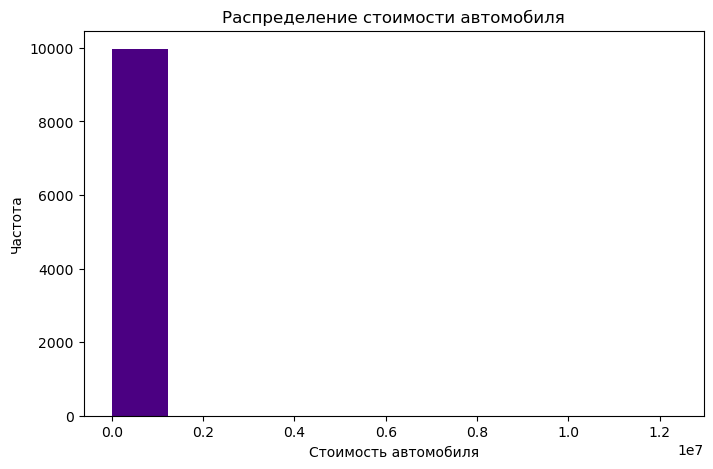

In [21]:
plt.figure(figsize = (8, 5))
plt.hist(df_copy.price, color = 'indigo')
plt.xlabel('Стоимость автомобиля')
plt.ylabel('Частота')
plt.title('Распределение стоимости автомобиля');

Определим, имеются ли в стоимости автомобиле аномальные значения. Для этого построим «ящик с усами» для стоимости автобомиля, настройте размер фигуры — 5x15, а также примените форматирование для отображения значений стоимости.

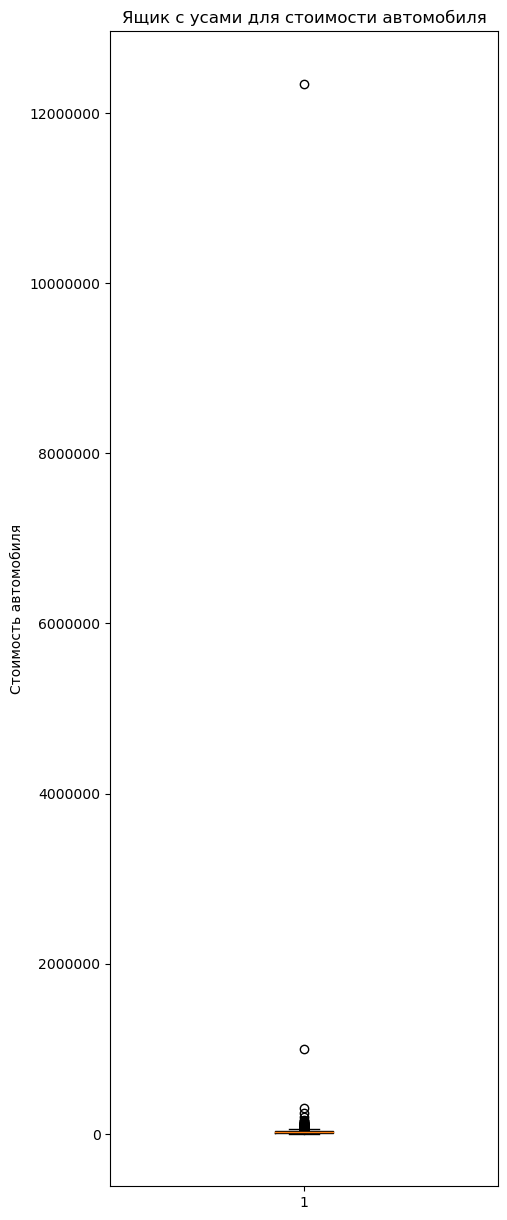

In [22]:
from matplotlib.ticker import FormatStrFormatter
fig, ax = plt.subplots(figsize = (5, 15))
ax.boxplot(df_copy.price)
ax.set_ylabel('Стоимость автомобиля')
ax.set_title('Ящик с усами для стоимости автомобиля')
ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))

Из «ящика с усами» можно увидеть, что выбросы действительно существуют, но из-за их большого разброса основаная часть графика («ящик») почти незаметна. Выведете описательные статистики стоимости автомобиля, чтобы изучить значения, обозначающие границы «ящика».

In [23]:
df_copy.price.describe().apply(lambda x: f"{x:0.3f}")

count        9964.000
mean        20599.565
std        124835.122
min           500.000
25%          7900.000
50%         15590.000
75%         27990.000
max      12345678.000
Name: price, dtype: object

Выведете границы для нормальных значений стоимости автомобиля, используя интерквартильный размах.

In [24]:
boundaries = calculate_outliers(df_copy.price)
boundaries

(-22235.0, 58125.0)

Определим количество выбросов в стоимости автомобиля

In [25]:
is_outlier = (df_copy.price < boundaries[0]) | (df_copy.price > boundaries[1])
is_outlier.sum()

207

Выведеv последние 15 записей в отсортированном ранее датафрейме с выбросами, чтобы изучить признаки для наиболее дорогих автомобилей.

In [26]:
df_copy[is_outlier].sort_values(by = 'price').iloc[-15:]

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,image_url,description,state,lat,long,posting_date,price_category,date
4133,7311841843,https://albuquerque.craigslist.org/ctd/d/albuq...,albuquerque,https://albuquerque.craigslist.org,120000,2021.0,chevrolet,corvette c8 z51,gas,10,clean,automatic,https://images.craigslist.org/00z0z_99zXyVvNmm...,New arrival Z51 Call or text annamarie for d...,nm,True,True,2021-04-24T08:38:45-0600,high,2021-04-24 14:38:45+00:00
1699,7303398175,https://pullman.craigslist.org/cto/d/pullman-6...,pullman / moscow,https://pullman.craigslist.org,123456,1994.0,other,cadvwrambuick,gas,283466,missing,other,https://images.craigslist.org/00i0i_5iBwIawLgG...,I have several cars to get rid of: A '65 Ramb...,id,True,True,2021-04-07T15:57:23-0700,high,2021-04-07 22:57:23+00:00
9194,7308732637,https://evansville.craigslist.org/ctd/d/evansv...,evansville,https://evansville.craigslist.org,123456,2006.0,jeep,wrangler,gas,12345,clean,other,https://images.craigslist.org/00I0I_2IkqjY69Zq...,Very Nice TJ jeeps and a few LJ jeep wranglers...,in,True,True,2021-04-18T09:55:42-0500,high,2021-04-18 14:55:42+00:00
3006,7308463617,https://jacksonville.craigslist.org/cto/d/pont...,jacksonville,https://jacksonville.craigslist.org,129000,2018.0,mercedes-benz,benz amg gt c,gas,4000,clean,automatic,https://images.craigslist.org/00C0C_bN8j4IcEqW...,Beautiful car in perfect condition. Very rare ...,fl,True,True,2021-04-17T16:48:42-0400,high,2021-04-17 20:48:42+00:00
5149,7314445453,https://boston.craigslist.org/gbs/ctd/d/methue...,boston,https://boston.craigslist.org,129995,2007.0,ferrari,f430 spider,gas,12351,clean,manual,https://images.craigslist.org/00q0q_3DqREXHC0j...,2007 Ferrari F430 Spider 2dr Convertible O...,ma,True,True,2021-04-29T14:45:08-0400,high,2021-04-29 18:45:08+00:00
6566,7312384300,https://orlando.craigslist.org/ctd/d/orlando-2...,orlando,https://orlando.craigslist.org,129999,2018.0,mercedes-benz,maybach s560,gas,6000,clean,automatic,https://images.craigslist.org/00u0u_fKyDNpMeQR...,"Serious/ready buyers, please call or text @ (4...",fl,True,True,2021-04-25T12:58:01-0400,high,2021-04-25 16:58:01+00:00
9024,7314817013,https://sandiego.craigslist.org/csd/ctd/d/dall...,san diego,https://sandiego.craigslist.org,139950,2017.0,other,Mclaren 570GT W/ Upgrades,gas,13000,clean,automatic,https://images.craigslist.org/00N0N_2egaCVi4pq...,SPECIALTYEXOTICS.COMCALL/TXT 469-215-1902FREE ...,ca,True,True,2021-04-30T08:20:20-0700,high,2021-04-30 15:20:20+00:00
4245,7316319465,https://portland.craigslist.org/clc/ctd/d/glad...,portland,https://portland.craigslist.org,149990,2015.0,mercedes-benz,sprinter 3500 airs,diesel,49291,clean,automatic,https://images.craigslist.org/00B0B_79v5I132cL...,2015 Mercedes-Benz Sprinter 3500 Airstream Int...,or,True,True,2021-05-03T11:04:09-0700,high,2021-05-03 18:04:09+00:00
8840,7313664504,https://austin.craigslist.org/cto/d/austin-sup...,austin,https://austin.craigslist.org,150000,2006.0,other,Peterbilt 378,diesel,1234,clean,manual,https://images.craigslist.org/00v0v_ejAvqrK3iP...,Selling a Wonderful Super Dump! 2006 Peterbilt...,tx,True,True,2021-04-27T21:01:28-0500,high,2021-04-28 02:01:28+00:00
9164,7306718413,https://desmoines.craigslist.org/ctd/d/portlan...,des moines,https://desmoines.craigslist.org,163540,2020.0,mercedes-benz,other,other,6318,clean,automatic,https://images.craigslist.org/00y0y_i26NvL7pZC...,2020 *** Mercedes-Benz G-Class G63 AMG*** ...,ia,True,True,2021-04-14T11:26:24-0500,high,2021-04-14 16:26:24+00:00


Удалим строки с аномальными стоимостями автомобилей.

In [27]:
df_copy = df_copy[~(is_outlier)]
df_copy.head()

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,image_url,description,state,lat,long,posting_date,price_category,date
0,7308295377,https://chattanooga.craigslist.org/ctd/d/chatt...,chattanooga,https://chattanooga.craigslist.org,54990,2020.0,ram,2500 crew cab big horn,diesel,27442,clean,other,https://images.craigslist.org/00N0N_1xMPvfxRAI...,Carvana is the safer way to buy a car During t...,tn,True,True,2021-04-17T12:30:50-0400,high,2021-04-17 16:30:50+00:00
1,7316380095,https://newjersey.craigslist.org/ctd/d/carlsta...,north jersey,https://newjersey.craigslist.org,16942,2016.0,ford,explorer 4wd 4dr xlt,other,60023,clean,automatic,https://images.craigslist.org/00x0x_26jl9F0cnL...,***Call Us for more information at: 201-635-14...,nj,True,True,2021-05-03T15:40:21-0400,medium,2021-05-03 19:40:21+00:00
2,7313733749,https://reno.craigslist.org/ctd/d/atlanta-2017...,reno / tahoe,https://reno.craigslist.org,35590,2017.0,volkswagen,golf r hatchback,gas,14048,clean,other,https://images.craigslist.org/00y0y_eeZjWeiSfb...,Carvana is the safer way to buy a car During t...,ca,True,True,2021-04-28T03:52:20-0700,high,2021-04-28 10:52:20+00:00
3,7308210929,https://fayetteville.craigslist.org/ctd/d/rale...,fayetteville,https://fayetteville.craigslist.org,14500,2013.0,toyota,rav4,gas,117291,clean,automatic,https://images.craigslist.org/00606_iGe5iXidib...,2013 Toyota RAV4 XLE 4dr SUV Offered by: R...,nc,True,True,2021-04-17T10:08:57-0400,medium,2021-04-17 14:08:57+00:00
4,7316474668,https://newyork.craigslist.org/lgi/cto/d/baldw...,new york city,https://newyork.craigslist.org,21800,2021.0,nissan,altima,gas,8000,clean,automatic,https://images.craigslist.org/00V0V_3pSOiPZ3Sd...,2021 Nissan Altima Sv with Only 8 K Miles Titl...,ny,True,True,2021-05-03T18:32:06-0400,medium,2021-05-03 22:32:06+00:00


In [28]:
df_copy['price'].describe()

count     9757.000000
mean     18061.048785
std      12504.356029
min        500.000000
25%       7600.000000
50%      15000.000000
75%      26995.000000
max      57999.000000
Name: price, dtype: float64

Сформируем и отобразим новый датафрейм, в котором будет содержаться статистика о годе производства автомобиля и среднем значении стоимости автомобиля за этот год

In [29]:
stats = df_copy.groupby(['year'], as_index = False).agg({'price':'mean'})
stats = stats.rename(columns = {'mean':'mean_price'})
stats

,year,price
0,1994.0,13528.049223
1,1995.0,9610.060606
2,1996.0,9362.960000
3,1997.0,7213.666667
4,1998.0,6528.672727
5,1999.0,7387.536585
6,2000.0,7614.410256
7,2001.0,7987.430894
8,2002.0,7173.798658
9,2003.0,7767.962162


Построим диаграмму рассеяния для визуализации зависимости стоимости от года выпуска автомобиля

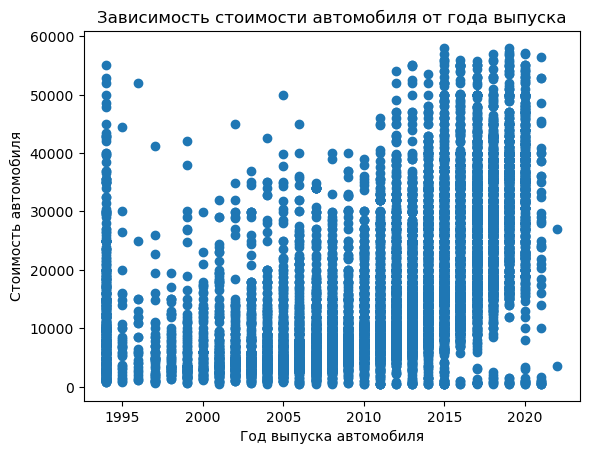

In [30]:
plt.figure()
plt.scatter(df_copy['year'], df_copy['price'])
plt.ylabel('Стоимость автомобиля')
plt.xlabel('Год выпуска автомобиля')
plt.title('Зависимость стоимости автомобиля от года выпуска')
plt.show();

Проверим, достаточно ли данных в выбивающихся из тренда значениях по годам. Для этого выведем количество автомобилей, произведенных в каждый год

In [31]:
stats1 = df_copy.groupby(['year'], as_index = False).agg({'id':'count'})
stats1 = stats1.rename(columns = {'id':'amount_of_car'})
stats1

,year,amount_of_car
0,1994.0,386
1,1995.0,33
2,1996.0,25
3,1997.0,45
4,1998.0,55
5,1999.0,82
6,2000.0,78
7,2001.0,123
8,2002.0,149
9,2003.0,185


За последние два года мало накопленной информации — исключим их из исследования. С помощью фильтрации оставим в датафрейме автомобили, произведенные не позднее 2021 года

In [32]:
df_copy = df_copy[~(df_copy['year'] == 2021)]
df_copy = df_copy[~(df_copy['year'] == 2022)]
df_copy.head()

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,image_url,description,state,lat,long,posting_date,price_category,date
0,7308295377,https://chattanooga.craigslist.org/ctd/d/chatt...,chattanooga,https://chattanooga.craigslist.org,54990,2020.0,ram,2500 crew cab big horn,diesel,27442,clean,other,https://images.craigslist.org/00N0N_1xMPvfxRAI...,Carvana is the safer way to buy a car During t...,tn,True,True,2021-04-17T12:30:50-0400,high,2021-04-17 16:30:50+00:00
1,7316380095,https://newjersey.craigslist.org/ctd/d/carlsta...,north jersey,https://newjersey.craigslist.org,16942,2016.0,ford,explorer 4wd 4dr xlt,other,60023,clean,automatic,https://images.craigslist.org/00x0x_26jl9F0cnL...,***Call Us for more information at: 201-635-14...,nj,True,True,2021-05-03T15:40:21-0400,medium,2021-05-03 19:40:21+00:00
2,7313733749,https://reno.craigslist.org/ctd/d/atlanta-2017...,reno / tahoe,https://reno.craigslist.org,35590,2017.0,volkswagen,golf r hatchback,gas,14048,clean,other,https://images.craigslist.org/00y0y_eeZjWeiSfb...,Carvana is the safer way to buy a car During t...,ca,True,True,2021-04-28T03:52:20-0700,high,2021-04-28 10:52:20+00:00
3,7308210929,https://fayetteville.craigslist.org/ctd/d/rale...,fayetteville,https://fayetteville.craigslist.org,14500,2013.0,toyota,rav4,gas,117291,clean,automatic,https://images.craigslist.org/00606_iGe5iXidib...,2013 Toyota RAV4 XLE 4dr SUV Offered by: R...,nc,True,True,2021-04-17T10:08:57-0400,medium,2021-04-17 14:08:57+00:00
5,7303797340,https://knoxville.craigslist.org/ctd/d/knoxvil...,knoxville,https://knoxville.craigslist.org,14590,2012.0,bmw,1 series 128i coupe 2d,other,80465,clean,other,https://images.craigslist.org/00F0F_5UAXmOzC18...,Carvana is the safer way to buy a car During t...,tn,True,True,2021-04-08T15:10:56-0400,medium,2021-04-08 19:10:56+00:00


На отфильтрованных данных повторим действия по формированию нового датафрейма, в котором будет содержаться статистика о годе производства автомобиля и среднем значении стоимости автомобиля за этот год.

In [33]:
stats2 = df_copy.groupby(['year'], as_index = False).agg({'price':'mean'})
stats2 = stats2.rename(columns = {'price':'mean_price'})
stats2

,year,mean_price
0,1994.0,13528.049223
1,1995.0,9610.060606
2,1996.0,9362.960000
3,1997.0,7213.666667
4,1998.0,6528.672727
5,1999.0,7387.536585
6,2000.0,7614.410256
7,2001.0,7987.430894
8,2002.0,7173.798658
9,2003.0,7767.962162


Построим линейный график для визуализации зависимости стоимости от года выпуска автомобиля

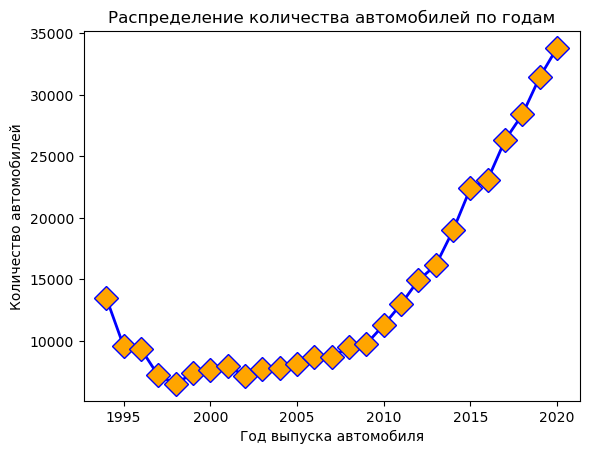

In [34]:
fig, ax = plt.subplots()

ax.plot(stats2['year'], stats2['mean_price'], color='blue', marker='D', linestyle='solid', linewidth=2, 
        markersize=12, markerfacecolor = 'orange')
ax.set_title('Распределение количества автомобилей по годам')
ax.set_xlabel('Год выпуска автомобиля')
ax.set_ylabel('Количество автомобилей')
plt.show()

Посчитаем коэффициент корреляции Пирсона для стоимости автомобиля и года его производства

In [35]:
df_copy['year'].corr(df_copy['price'])

0.5435846605512143

Для обновленных данных построим гистограмму распределения стоимости автомобиля

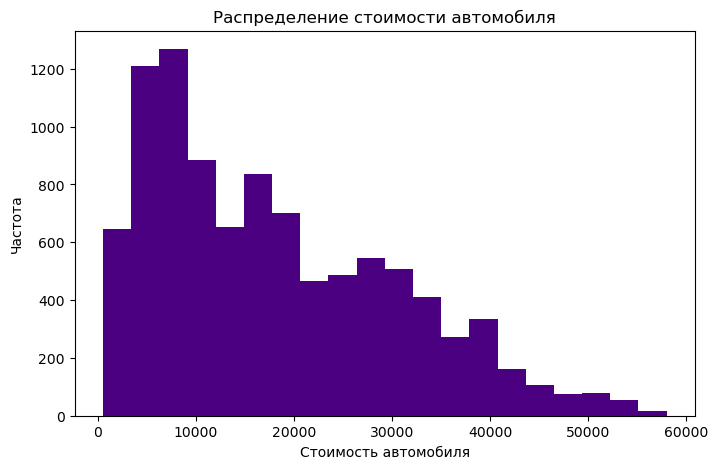

In [36]:
plt.figure(figsize = (8, 5))
plt.hist(df_copy.price, bins = 20, color = 'indigo')
plt.xlabel('Стоимость автомобиля')
plt.ylabel('Частота')
plt.title('Распределение стоимости автомобиля');

На одном полотне построим графики распределения стоимости автомобиля для каждой из ценовой категории автомобиля

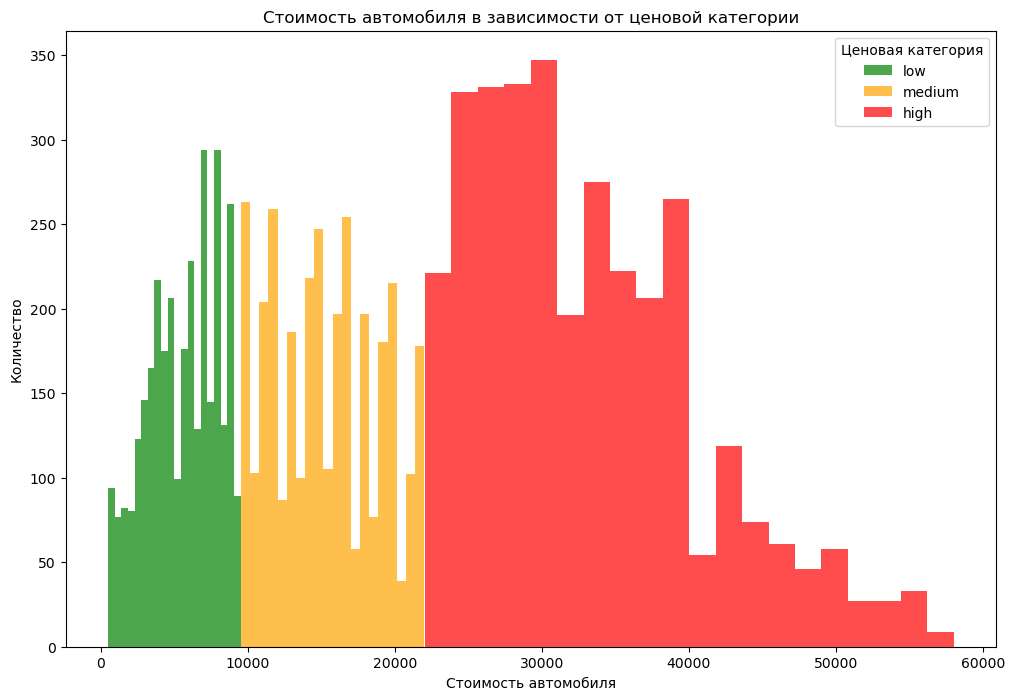

In [37]:
colors = {'low':'green', 'medium':'orange', 'high':'red'}
fig, ax = plt.subplots(figsize = (12,8))
for price_category in colors:
    color = colors[price_category]
    data = df_copy[df_copy['price_category'] == price_category]
    ax.hist(data['price'], bins = 20, color = color, alpha = 0.7)
plt.xlabel('Стоимость автомобиля')
plt.ylabel('Количество')
plt.title('Стоимость автомобиля в зависимости от ценовой категории')
plt.legend(colors, title = 'Ценовая категория');

На одном полотне построим диаграмму рассеяния для стоимости автомобиля и его года выпуска

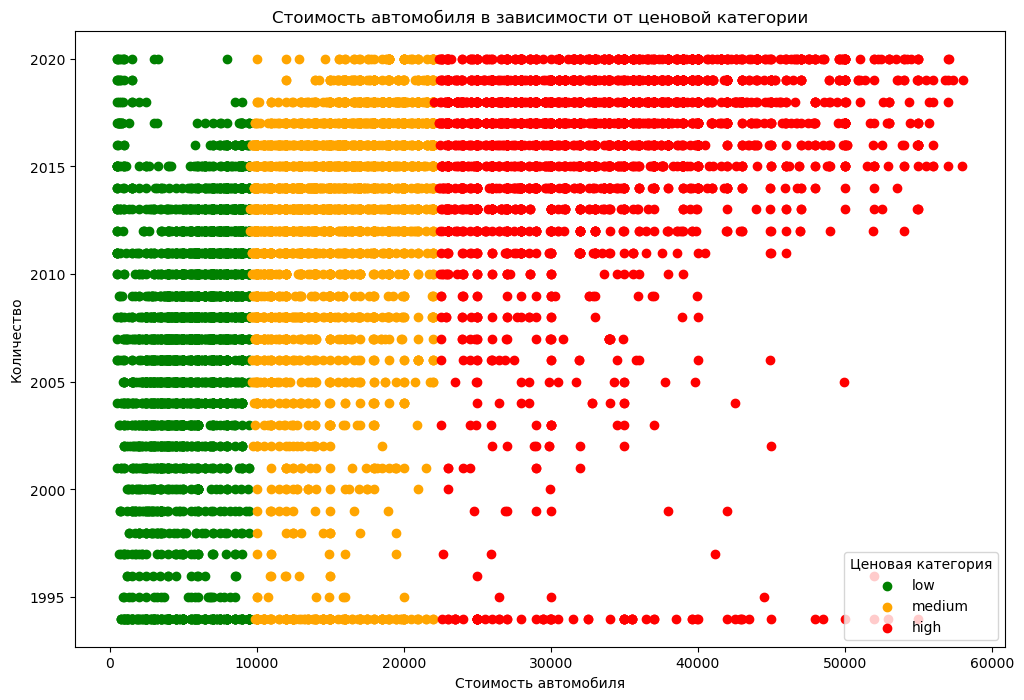

In [38]:
colors = {'low':'green', 'medium':'orange', 'high':'red'}
fig, ax = plt.subplots(figsize = (12,8))
for price_category in colors:
    color = colors[price_category]
    data = df_copy[df_copy['price_category'] == price_category]
    ax.scatter(data['price'], data['year'], c = color, label = price_category)
plt.xlabel('Стоимость автомобиля')
plt.ylabel('Количество')
plt.title('Стоимость автомобиля в зависимости от ценовой категории')
plt.legend(loc = 'lower right', title = 'Ценовая категория')
plt.show()

Сформируем и отобразим новый датафрейм, в котором будет содержаться статистика о производителе автомобиля и количестве произведенных им автомобилей

In [39]:
new_stats = df_copy.groupby(['manufacturer'], as_index = False).agg({'id':'count'})
new_stats = new_stats.rename(columns = {'id':'amount_of_car'})
new_stats

,manufacturer,amount_of_car
0,acura,150
1,alfa-romeo,14
2,audi,194
3,bmw,326
4,buick,144
5,cadillac,177
6,chevrolet,1244
7,chrysler,160
8,datsun,2
9,dodge,321


Построим столбчатую диаграмму для производителей автомобиля

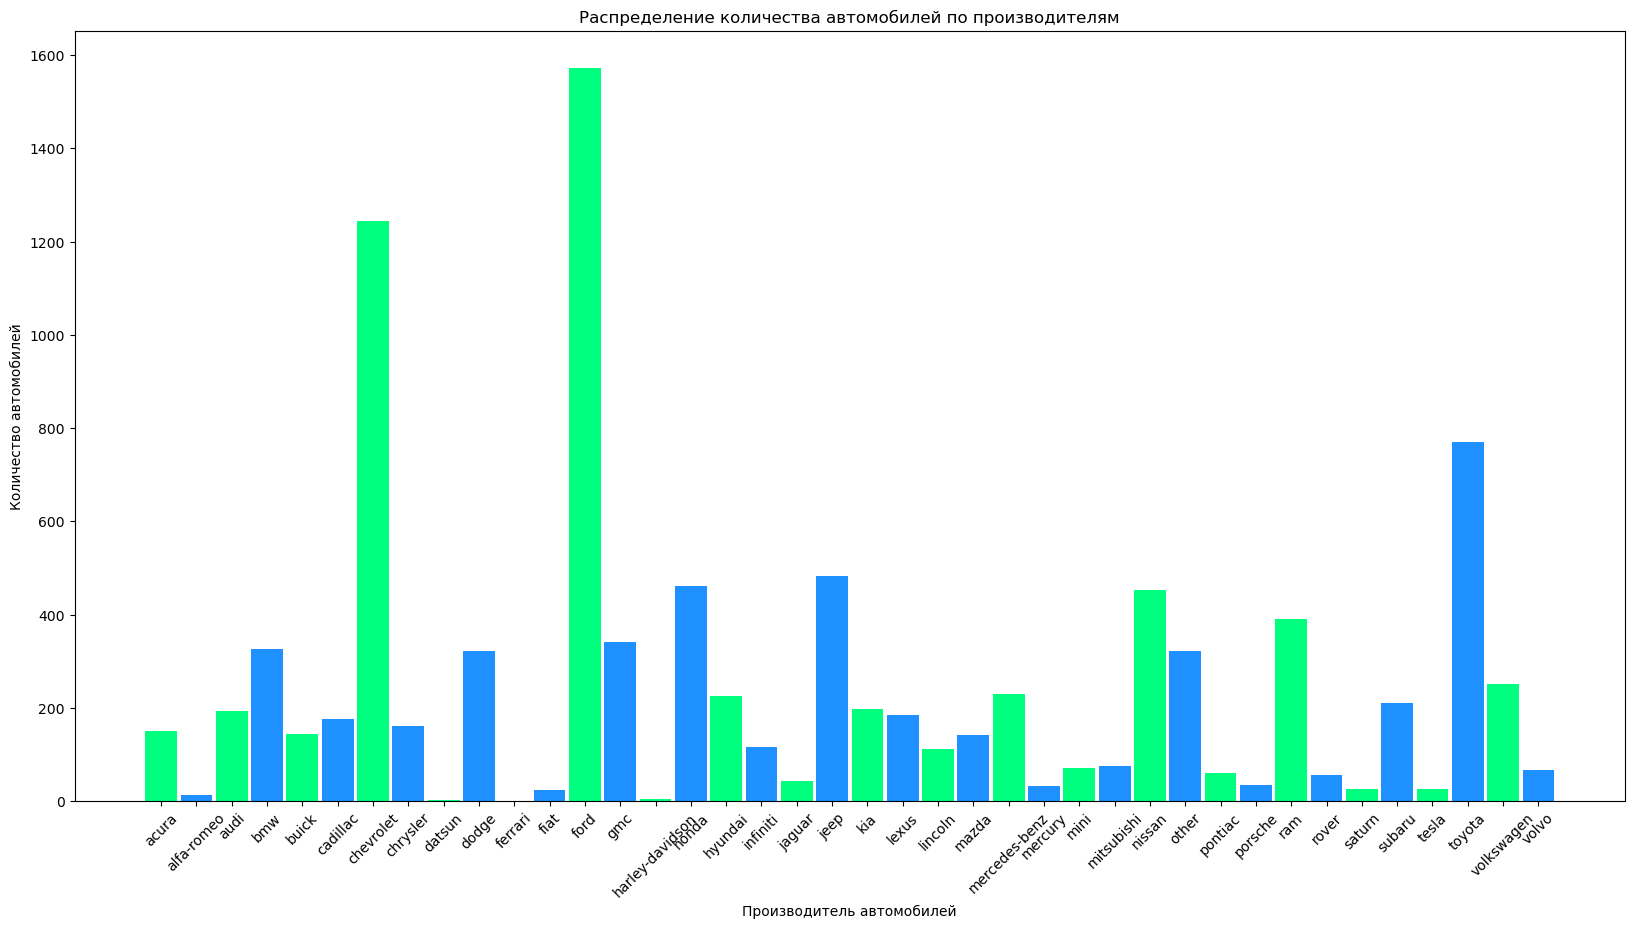

In [40]:
plt.figure(figsize = (20, 10))
plt.bar(new_stats['manufacturer'], new_stats['amount_of_car'], color = ['springgreen', 'dodgerblue'], width = 0.9)
plt.xlabel('Производитель автомобилей')
plt.xticks(rotation = 45)
plt.ylabel('Количество автомобилей')
plt.title('Распределение количества автомобилей по производителям');

Сформируем и отобразим новый датафрейм, в котором будет содержаться статистика о коробке передач автомобиля и количестве автомобилей с такой коробкой передач

In [41]:
new_stats1 = df_copy.groupby(['transmission'], as_index = False).agg({'id':'count'})
new_stats1 = new_stats1.rename(columns = {'id':'amount_of_car'})
new_stats1

,transmission,amount_of_car
0,automatic,7451
1,manual,617
2,other,1645


Построbv круговую диаграмму для коробки передач автомобиля

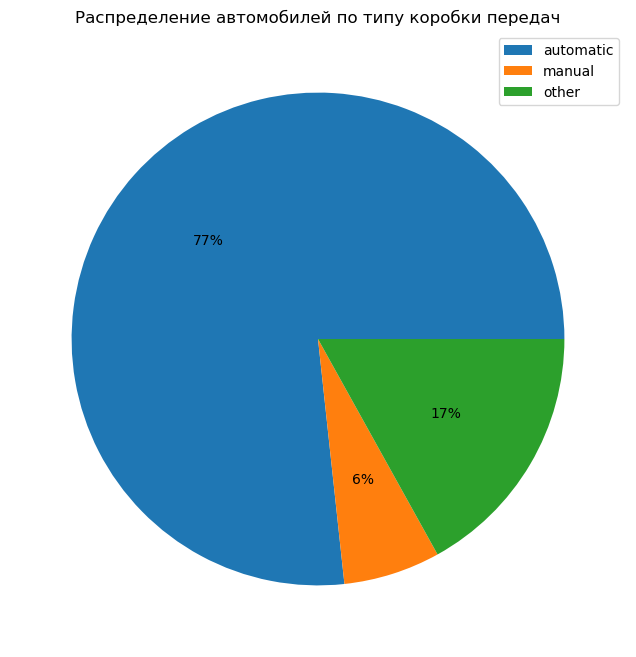

In [42]:
plt.figure(figsize = (12, 8))
plt.pie(new_stats1['amount_of_car'], labels = new_stats1['transmission'], labeldistance = None, autopct = '%1.0f%%')
plt.title('Распределение автомобилей по типу коробки передач')
plt.legend()
plt.show();

## Feature Engineering

3. *Feature engineering*

Объявите блок Feature engineering. В этом блоке:
* подготовьте категориальные переменные с помощью OneHotEncoder;
* стандартизируйте и нормализуйте переменные, если нужно;
* создайте новые признаки на основе информации в датафрейме (на основе дат, текстовых значений переменных, и так далее);
* удалите неинформативные колонки, которые появились в датасете в результате Feature engineering;
* сформируйте финальный датасет, на котором будет производиться моделирование, и сохраните его в отдельный файл.

В решении данной задачи опирайтесь на результаты работы в 20 модуле блока Data Preparation. Исследование подкрепляйте соответствующей визуализацией в виде графиков, таблиц или матриц корреляций, если это нужно.

Декомпозируйте блок на подблоки.

### Building features from strings

Выведем список значений и количество уникальных значений для модели автомобиля

In [43]:
print('Список уникальных моделей автомобилей', df_copy['model'].unique())
print('Количество уникальных значений для модели автомобиля', df_copy['model'].nunique())

Список уникальных моделей автомобилей ['2500 crew cab big horn' 'explorer 4wd 4dr xlt' 'golf r hatchback' ...
 'f750 super duty - 55ft' '1988 Nisan' 'a3 2.0t premium plus pzev']
Количество уникальных значений для модели автомобиля 3350


Количество уникальных значений велико. Попробуем их сократить, оставив только первое слово в наименовании модели

In [44]:
df_copy['short_model'] = df_copy.model.apply(lambda x: x.lower().split(' ')[0])
df_copy['short_model']

0           2500
1       explorer
2           golf
3           rav4
5              1
          ...   
9995        rav4
9996    wrangler
9997          a3
9998     cayenne
9999        1500
Name: short_model, Length: 9713, dtype: object

### Transformation of categorical variables

Распечатаем наименование некоторых категории и количество уникальных значений в них

In [45]:
print('Количество уникальных значений для short_model:', df_copy['short_model'].nunique())
print('Количество уникальных значений для transmission:', df_copy['transmission'].nunique())
print('Количество уникальных значений для region:', df_copy['region'].nunique())
print('Количество уникальных значений для manufacturer:', df_copy['manufacturer'].nunique())
print('Количество уникальных значений для state:', df_copy['state'].nunique())
print('Количество уникальных значений для title_status:', df_copy['title_status'].nunique())
#print('Количество уникальных значений для age_category:', df_copy['age_category'].nunique())

Количество уникальных значений для short_model: 909
Количество уникальных значений для transmission: 3
Количество уникальных значений для region: 393
Количество уникальных значений для manufacturer: 40
Количество уникальных значений для state: 51
Количество уникальных значений для title_status: 6


Создаем датафрейм data, содержащий только выбранные категориальные переменные

In [46]:
data = df_copy[['short_model', 'transmission', 'region', 'manufacturer', 'state', 
          'title_status']]
data.head()

,short_model,transmission,region,manufacturer,state,title_status
0,2500,other,chattanooga,ram,tn,clean
1,explorer,automatic,north jersey,ford,nj,clean
2,golf,other,reno / tahoe,volkswagen,ca,clean
3,rav4,automatic,fayetteville,toyota,nc,clean
5,1,other,knoxville,bmw,tn,clean


Создадим объект класса OneHotEncoder, который будет отвечать за преобразование

In [47]:
ohe = OneHotEncoder(sparse = False)
ohe

OneHotEncoder(sparse=False)

Идентифицируем параметры преобразования на датафрейме с категориальными переменными

In [48]:
ohe.fit(data[['short_model', 'transmission', 'region', 'manufacturer', 'state', 'title_status']])

C:\Users\A315-23-R7CZ\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


OneHotEncoder(sparse=False, sparse_output=False)

Применим преобразование для датафрейма с категориальными переменными и сохраним в новую переменную, распечатаем получившуюся матрицу и её размерность

In [49]:
ohe_short_model = ohe.transform(data[['short_model', 'transmission', 'region', 'manufacturer', 'state', 'title_status']])
ohe_short_model

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

Выведем новые наименования признаков с помощью метода get_feature_names_out

In [50]:
ohe.get_feature_names_out()

array(['short_model_-benz', 'short_model_1', 'short_model_124', ...,
       'title_status_parts only', 'title_status_rebuilt',
       'title_status_salvage'], dtype=object)

Добавим в исходный датафрейм получившиеся новые признаки, выведем первые пять записей датафрейма и список колонок.

In [51]:
df_copy[ohe.get_feature_names_out()] = ohe_short_model
df_copy.head()

c:\Temp\ipykernel_16376\2825061912.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_copy[ohe.get_feature_names_out()] = ohe_short_model
c:\Temp\ipykernel_16376\2825061912.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_copy[ohe.get_feature_names_out()] = ohe_short_model
c:\Temp\ipykernel_16376\2825061912.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) i

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,...,state_wa,state_wi,state_wv,state_wy,title_status_clean,title_status_lien,title_status_missing,title_status_parts only,title_status_rebuilt,title_status_salvage
0,7308295377,https://chattanooga.craigslist.org/ctd/d/chatt...,chattanooga,https://chattanooga.craigslist.org,54990,2020.0,ram,2500 crew cab big horn,diesel,27442,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,7316380095,https://newjersey.craigslist.org/ctd/d/carlsta...,north jersey,https://newjersey.craigslist.org,16942,2016.0,ford,explorer 4wd 4dr xlt,other,60023,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,7313733749,https://reno.craigslist.org/ctd/d/atlanta-2017...,reno / tahoe,https://reno.craigslist.org,35590,2017.0,volkswagen,golf r hatchback,gas,14048,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,7308210929,https://fayetteville.craigslist.org/ctd/d/rale...,fayetteville,https://fayetteville.craigslist.org,14500,2013.0,toyota,rav4,gas,117291,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5,7303797340,https://knoxville.craigslist.org/ctd/d/knoxvil...,knoxville,https://knoxville.craigslist.org,14590,2012.0,bmw,1 series 128i coupe 2d,other,80465,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [52]:
df_copy.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'fuel', 'odometer',
       ...
       'state_wa', 'state_wi', 'state_wv', 'state_wy', 'title_status_clean',
       'title_status_lien', 'title_status_missing', 'title_status_parts only',
       'title_status_rebuilt', 'title_status_salvage'],
      dtype='object', length=1423)

Посмотрим на результат обратного преобразования получившейся матрицы в исходные признаки, используя inverse_transform.

In [53]:
ohe.inverse_transform(ohe_short_model)

array([['2500', 'other', 'chattanooga', 'ram', 'tn', 'clean'],
       ['explorer', 'automatic', 'north jersey', 'ford', 'nj', 'clean'],
       ['golf', 'other', 'reno / tahoe', 'volkswagen', 'ca', 'clean'],
       ...,
       ['a3', 'automatic', 'salem', 'audi', 'or', 'clean'],
       ['cayenne', 'automatic', 'madison', 'porsche', 'wi', 'clean'],
       ['1500', 'other', 'norfolk / hampton roads', 'ram', 'va', 'clean']],
      dtype=object)

### Data Standartization

Создадим переменную под количественные переменные 

In [54]:
first_var = ['lat', 'long', 'year']
data = pd.DataFrame()
data = df_copy[first_var]
data.head()

,lat,long,year
0,True,True,2020.0
1,True,True,2016.0
2,True,True,2017.0
3,True,True,2013.0
5,True,True,2012.0


Создадим объект std_scaler класса StandardScaler с параметрами по умолчанию, который будет отвечать за стандартизацию

In [55]:
std_scaler = StandardScaler()
std_scaler

StandardScaler()

Идентифицируем параметры преобразования на датафрейме с количественными переменными

In [56]:
std_scaler.fit(data)

StandardScaler()

Применим преобразование для датафрейма с количественными переменными и сохраним в новую переменную

In [57]:
std_scaled = std_scaler.transform(data)
std_scaled

array([[ 0.09885507,  0.09885507,  1.30822326],
       [ 0.09885507,  0.09885507,  0.69066266],
       [ 0.09885507,  0.09885507,  0.84505281],
       ...,
       [ 0.09885507,  0.09885507, -0.08128809],
       [ 0.09885507,  0.09885507,  0.53627251],
       [ 0.09885507,  0.09885507,  0.84505281]])

Создадим наименования новых признаков по шаблону: lat_std для lat и так далее

In [58]:
variables = ['lat_std', 'long_std', 'year_std']

Добавим в исходный датафрейм получившиеся новые признаки

In [59]:
df_copy[variables] = std_scaled
df_copy.head()

c:\Temp\ipykernel_16376\2727113728.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_copy[variables] = std_scaled
c:\Temp\ipykernel_16376\2727113728.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_copy[variables] = std_scaled
c:\Temp\ipykernel_16376\2727113728.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `new

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,...,state_wy,title_status_clean,title_status_lien,title_status_missing,title_status_parts only,title_status_rebuilt,title_status_salvage,lat_std,long_std,year_std
0,7308295377,https://chattanooga.craigslist.org/ctd/d/chatt...,chattanooga,https://chattanooga.craigslist.org,54990,2020.0,ram,2500 crew cab big horn,diesel,27442,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.098855,0.098855,1.308223
1,7316380095,https://newjersey.craigslist.org/ctd/d/carlsta...,north jersey,https://newjersey.craigslist.org,16942,2016.0,ford,explorer 4wd 4dr xlt,other,60023,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.098855,0.098855,0.690663
2,7313733749,https://reno.craigslist.org/ctd/d/atlanta-2017...,reno / tahoe,https://reno.craigslist.org,35590,2017.0,volkswagen,golf r hatchback,gas,14048,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.098855,0.098855,0.845053
3,7308210929,https://fayetteville.craigslist.org/ctd/d/rale...,fayetteville,https://fayetteville.craigslist.org,14500,2013.0,toyota,rav4,gas,117291,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.098855,0.098855,0.227492
5,7303797340,https://knoxville.craigslist.org/ctd/d/knoxvil...,knoxville,https://knoxville.craigslist.org,14590,2012.0,bmw,1 series 128i coupe 2d,other,80465,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.098855,0.098855,0.073102


### MinMax Data Normalization

Создадим датафрейм, содержащий переменные lat и long.

In [60]:
data_new = df_copy[['lat', 'long']]
data_new.head()

,lat,long
0,True,True
1,True,True
2,True,True
3,True,True
5,True,True


In [61]:
min_max_scaler = MinMaxScaler()
min_max_scaler

MinMaxScaler()

In [62]:
min_max_scaler.fit(data_new)

MinMaxScaler()

In [63]:
min_max__scaled = min_max_scaler.transform(data_new)
min_max__scaled

array([[1., 1.],
       [1., 1.],
       [1., 1.],
       ...,
       [1., 1.],
       [1., 1.],
       [1., 1.]])

In [64]:
new_var = ['lat_mm', 'long_mm']

In [65]:
df_copy[new_var] = min_max__scaled
df_copy.head()

c:\Temp\ipykernel_16376\3659878312.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_copy[new_var] = min_max__scaled
c:\Temp\ipykernel_16376\3659878312.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_copy[new_var] = min_max__scaled


,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,...,title_status_lien,title_status_missing,title_status_parts only,title_status_rebuilt,title_status_salvage,lat_std,long_std,year_std,lat_mm,long_mm
0,7308295377,https://chattanooga.craigslist.org/ctd/d/chatt...,chattanooga,https://chattanooga.craigslist.org,54990,2020.0,ram,2500 crew cab big horn,diesel,27442,...,0.0,0.0,0.0,0.0,0.0,0.098855,0.098855,1.308223,1.0,1.0
1,7316380095,https://newjersey.craigslist.org/ctd/d/carlsta...,north jersey,https://newjersey.craigslist.org,16942,2016.0,ford,explorer 4wd 4dr xlt,other,60023,...,0.0,0.0,0.0,0.0,0.0,0.098855,0.098855,0.690663,1.0,1.0
2,7313733749,https://reno.craigslist.org/ctd/d/atlanta-2017...,reno / tahoe,https://reno.craigslist.org,35590,2017.0,volkswagen,golf r hatchback,gas,14048,...,0.0,0.0,0.0,0.0,0.0,0.098855,0.098855,0.845053,1.0,1.0
3,7308210929,https://fayetteville.craigslist.org/ctd/d/rale...,fayetteville,https://fayetteville.craigslist.org,14500,2013.0,toyota,rav4,gas,117291,...,0.0,0.0,0.0,0.0,0.0,0.098855,0.098855,0.227492,1.0,1.0
5,7303797340,https://knoxville.craigslist.org/ctd/d/knoxvil...,knoxville,https://knoxville.craigslist.org,14590,2012.0,bmw,1 series 128i coupe 2d,other,80465,...,0.0,0.0,0.0,0.0,0.0,0.098855,0.098855,0.073102,1.0,1.0


Создадим переменную под географические признаки lat, lat_std, lat_mm, long, long_std, long_mm

In [66]:
geo = ['lat', 'lat_std', 'lat_mm', 'long', 'long_std', 'long_mm']
df_copy[geo]

,lat,lat_std,lat_mm,long,long_std,long_mm
0,True,0.098855,1.0,True,0.098855,1.0
1,True,0.098855,1.0,True,0.098855,1.0
2,True,0.098855,1.0,True,0.098855,1.0
3,True,0.098855,1.0,True,0.098855,1.0
5,True,0.098855,1.0,True,0.098855,1.0
...,...,...,...,...,...,...
9995,True,0.098855,1.0,True,0.098855,1.0
9996,True,0.098855,1.0,True,0.098855,1.0
9997,True,0.098855,1.0,True,0.098855,1.0
9998,True,0.098855,1.0,True,0.098855,1.0


Выведем описательные статистики для всех географических признаков

In [67]:
df_copy[geo].describe().style.format("{:.2f}")

,lat_std,lat_mm,long_std,long_mm
count,9713.00,9713.00,9713.00,9713.00
mean,-0.00,0.99,-0.00,0.99
std,1.00,0.10,1.00,0.10
min,-10.12,0.00,-10.12,0.00
25%,0.10,1.00,0.10,1.00
50%,0.10,1.00,0.10,1.00
75%,0.10,1.00,0.10,1.00
max,0.10,1.00,0.10,1.00


Выведим матрицу корреляций для всех географических признаков, чтобы убедиться, что нормализация признаков сохранила свойства исходных признаков

In [68]:
df_copy[geo].corr().style.format("{:.2f}")

,lat,lat_std,lat_mm,long,long_std,long_mm
lat,1.00,1.00,1.00,1.00,1.00,1.00
lat_std,1.00,1.00,1.00,1.00,1.00,1.00
lat_mm,1.00,1.00,1.00,1.00,1.00,1.00
long,1.00,1.00,1.00,1.00,1.00,1.00
long_std,1.00,1.00,1.00,1.00,1.00,1.00
long_mm,1.00,1.00,1.00,1.00,1.00,1.00


### Date-based Features

Выведим по отдельности колонки posting_date и date.

In [69]:
df_copy[['posting_date','date']]

,posting_date,date
0,2021-04-17T12:30:50-0400,2021-04-17 16:30:50+00:00
1,2021-05-03T15:40:21-0400,2021-05-03 19:40:21+00:00
2,2021-04-28T03:52:20-0700,2021-04-28 10:52:20+00:00
3,2021-04-17T10:08:57-0400,2021-04-17 14:08:57+00:00
5,2021-04-08T15:10:56-0400,2021-04-08 19:10:56+00:00
...,...,...
9995,2021-04-10T16:33:57-0400,2021-04-10 20:33:57+00:00
9996,2021-05-03T09:36:30-0400,2021-05-03 13:36:30+00:00
9997,2021-04-22T12:14:01-0700,2021-04-22 19:14:01+00:00
9998,2021-04-14T09:14:42-0500,2021-04-14 14:14:42+00:00


Ранее преобразованная колонка date после сохранения в файл и загрузки из него содержит данные в строковом формате, поэтому изменим её тип c помощью pd.to_datetime.

In [70]:
df_copy['date'] = pd.to_datetime(df_copy['date'], utc = True)
df_copy['date']

0      2021-04-17 16:30:50+00:00
1      2021-05-03 19:40:21+00:00
2      2021-04-28 10:52:20+00:00
3      2021-04-17 14:08:57+00:00
5      2021-04-08 19:10:56+00:00
                  ...           
9995   2021-04-10 20:33:57+00:00
9996   2021-05-03 13:36:30+00:00
9997   2021-04-22 19:14:01+00:00
9998   2021-04-14 14:14:42+00:00
9999   2021-04-24 17:50:49+00:00
Name: date, Length: 9713, dtype: datetime64[ns, UTC]

Создадим признак month, обозначающий номер месяца размещения объявления о продаже автомобиля.

In [71]:
df_copy['month'] = df_copy['date'].apply(lambda x:x.month)
df_copy.head()

c:\Temp\ipykernel_16376\1419281300.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_copy['month'] = df_copy['date'].apply(lambda x:x.month)


,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,...,title_status_missing,title_status_parts only,title_status_rebuilt,title_status_salvage,lat_std,long_std,year_std,lat_mm,long_mm,month
0,7308295377,https://chattanooga.craigslist.org/ctd/d/chatt...,chattanooga,https://chattanooga.craigslist.org,54990,2020.0,ram,2500 crew cab big horn,diesel,27442,...,0.0,0.0,0.0,0.0,0.098855,0.098855,1.308223,1.0,1.0,4
1,7316380095,https://newjersey.craigslist.org/ctd/d/carlsta...,north jersey,https://newjersey.craigslist.org,16942,2016.0,ford,explorer 4wd 4dr xlt,other,60023,...,0.0,0.0,0.0,0.0,0.098855,0.098855,0.690663,1.0,1.0,5
2,7313733749,https://reno.craigslist.org/ctd/d/atlanta-2017...,reno / tahoe,https://reno.craigslist.org,35590,2017.0,volkswagen,golf r hatchback,gas,14048,...,0.0,0.0,0.0,0.0,0.098855,0.098855,0.845053,1.0,1.0,4
3,7308210929,https://fayetteville.craigslist.org/ctd/d/rale...,fayetteville,https://fayetteville.craigslist.org,14500,2013.0,toyota,rav4,gas,117291,...,0.0,0.0,0.0,0.0,0.098855,0.098855,0.227492,1.0,1.0,4
5,7303797340,https://knoxville.craigslist.org/ctd/d/knoxvil...,knoxville,https://knoxville.craigslist.org,14590,2012.0,bmw,1 series 128i coupe 2d,other,80465,...,0.0,0.0,0.0,0.0,0.098855,0.098855,0.073102,1.0,1.0,4


Создадим признак dayofweek, обозначающий день недели размещения объявления о продаже автомобиля

In [72]:
df_copy['dayofweek'] = df_copy['date'].apply(lambda x:x.day)
df_copy.head()

c:\Temp\ipykernel_16376\702459142.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_copy['dayofweek'] = df_copy['date'].apply(lambda x:x.day)


,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,...,title_status_parts only,title_status_rebuilt,title_status_salvage,lat_std,long_std,year_std,lat_mm,long_mm,month,dayofweek
0,7308295377,https://chattanooga.craigslist.org/ctd/d/chatt...,chattanooga,https://chattanooga.craigslist.org,54990,2020.0,ram,2500 crew cab big horn,diesel,27442,...,0.0,0.0,0.0,0.098855,0.098855,1.308223,1.0,1.0,4,17
1,7316380095,https://newjersey.craigslist.org/ctd/d/carlsta...,north jersey,https://newjersey.craigslist.org,16942,2016.0,ford,explorer 4wd 4dr xlt,other,60023,...,0.0,0.0,0.0,0.098855,0.098855,0.690663,1.0,1.0,5,3
2,7313733749,https://reno.craigslist.org/ctd/d/atlanta-2017...,reno / tahoe,https://reno.craigslist.org,35590,2017.0,volkswagen,golf r hatchback,gas,14048,...,0.0,0.0,0.0,0.098855,0.098855,0.845053,1.0,1.0,4,28
3,7308210929,https://fayetteville.craigslist.org/ctd/d/rale...,fayetteville,https://fayetteville.craigslist.org,14500,2013.0,toyota,rav4,gas,117291,...,0.0,0.0,0.0,0.098855,0.098855,0.227492,1.0,1.0,4,17
5,7303797340,https://knoxville.craigslist.org/ctd/d/knoxvil...,knoxville,https://knoxville.craigslist.org,14590,2012.0,bmw,1 series 128i coupe 2d,other,80465,...,0.0,0.0,0.0,0.098855,0.098855,0.073102,1.0,1.0,4,8


Создадим признак diff_years, обозначающий количество лет между годом производства автомобиля и годом размещения объявления о продаже автомобиля

In [73]:
df_copy['diff_years'] = df_copy.apply(lambda x: x.date.year - x.year, axis = 1)
df_copy.head()

c:\Temp\ipykernel_16376\3077670406.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_copy['diff_years'] = df_copy.apply(lambda x: x.date.year - x.year, axis = 1)


,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,...,title_status_rebuilt,title_status_salvage,lat_std,long_std,year_std,lat_mm,long_mm,month,dayofweek,diff_years
0,7308295377,https://chattanooga.craigslist.org/ctd/d/chatt...,chattanooga,https://chattanooga.craigslist.org,54990,2020.0,ram,2500 crew cab big horn,diesel,27442,...,0.0,0.0,0.098855,0.098855,1.308223,1.0,1.0,4,17,1.0
1,7316380095,https://newjersey.craigslist.org/ctd/d/carlsta...,north jersey,https://newjersey.craigslist.org,16942,2016.0,ford,explorer 4wd 4dr xlt,other,60023,...,0.0,0.0,0.098855,0.098855,0.690663,1.0,1.0,5,3,5.0
2,7313733749,https://reno.craigslist.org/ctd/d/atlanta-2017...,reno / tahoe,https://reno.craigslist.org,35590,2017.0,volkswagen,golf r hatchback,gas,14048,...,0.0,0.0,0.098855,0.098855,0.845053,1.0,1.0,4,28,4.0
3,7308210929,https://fayetteville.craigslist.org/ctd/d/rale...,fayetteville,https://fayetteville.craigslist.org,14500,2013.0,toyota,rav4,gas,117291,...,0.0,0.0,0.098855,0.098855,0.227492,1.0,1.0,4,17,8.0
5,7303797340,https://knoxville.craigslist.org/ctd/d/knoxvil...,knoxville,https://knoxville.craigslist.org,14590,2012.0,bmw,1 series 128i coupe 2d,other,80465,...,0.0,0.0,0.098855,0.098855,0.073102,1.0,1.0,4,8,9.0


Применим стандартизацию к новым признаками и сохраним результат в новые признаки вида month_std.

In [74]:
std_scaler.fit(df_copy[['month', 'dayofweek', 'diff_years']])

StandardScaler()

In [75]:
std_scaled1 = std_scaler.transform(df_copy[['month', 'dayofweek', 'diff_years']])

In [76]:
df_copy[['month_std', 'dayofweek_std', 'diff_years_std']] = std_scaled1
df_copy.head()

c:\Temp\ipykernel_16376\709693642.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_copy[['month_std', 'dayofweek_std', 'diff_years_std']] = std_scaled1
c:\Temp\ipykernel_16376\709693642.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_copy[['month_std', 'dayofweek_std', 'diff_years_std']] = std_scaled1
c:\Temp\ipykernel_16376\709693642.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,...,long_std,year_std,lat_mm,long_mm,month,dayofweek,diff_years,month_std,dayofweek_std,diff_years_std
0,7308295377,https://chattanooga.craigslist.org/ctd/d/chatt...,chattanooga,https://chattanooga.craigslist.org,54990,2020.0,ram,2500 crew cab big horn,diesel,27442,...,0.098855,1.308223,1.0,1.0,4,17,1.0,-0.613962,0.168207,-1.308223
1,7316380095,https://newjersey.craigslist.org/ctd/d/carlsta...,north jersey,https://newjersey.craigslist.org,16942,2016.0,ford,explorer 4wd 4dr xlt,other,60023,...,0.098855,0.690663,1.0,1.0,5,3,5.0,1.628765,-1.213353,-0.690663
2,7313733749,https://reno.craigslist.org/ctd/d/atlanta-2017...,reno / tahoe,https://reno.craigslist.org,35590,2017.0,volkswagen,golf r hatchback,gas,14048,...,0.098855,0.845053,1.0,1.0,4,28,4.0,-0.613962,1.253718,-0.845053
3,7308210929,https://fayetteville.craigslist.org/ctd/d/rale...,fayetteville,https://fayetteville.craigslist.org,14500,2013.0,toyota,rav4,gas,117291,...,0.098855,0.227492,1.0,1.0,4,17,8.0,-0.613962,0.168207,-0.227492
5,7303797340,https://knoxville.craigslist.org/ctd/d/knoxvil...,knoxville,https://knoxville.craigslist.org,14590,2012.0,bmw,1 series 128i coupe 2d,other,80465,...,0.098855,0.073102,1.0,1.0,4,8,9.0,-0.613962,-0.719939,-0.073102


### Saving Data Frame for Modeling

Удалим неинформативные колонки из датафрейма

In [77]:
columns_for_drop = ['year', 'url', 'region', 'region_url', 'manufacturer',
                    'model', 'fuel', 'odometer', 'title_status', 'transmission',
                    'image_url', 'description', 'state', 'lat', 'long', 'posting_date',
                    'short_model', 'lat_mm', 'long_mm', 'date', 'month', 'dayofweek', 'diff_years']

df_copy.drop(columns = columns_for_drop, axis = 1 , inplace= True )
df_copy.head()

,id,price,price_category,short_model_-benz,short_model_1,short_model_124,short_model_128i,short_model_135i,short_model_1500,short_model_163869,...,title_status_missing,title_status_parts only,title_status_rebuilt,title_status_salvage,lat_std,long_std,year_std,month_std,dayofweek_std,diff_years_std
0,7308295377,54990,high,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.098855,0.098855,1.308223,-0.613962,0.168207,-1.308223
1,7316380095,16942,medium,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.098855,0.098855,0.690663,1.628765,-1.213353,-0.690663
2,7313733749,35590,high,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.098855,0.098855,0.845053,-0.613962,1.253718,-0.845053
3,7308210929,14500,medium,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.098855,0.098855,0.227492,-0.613962,0.168207,-0.227492
5,7303797340,14590,medium,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.098855,0.098855,0.073102,-0.613962,-0.719939,-0.073102


Запишем преобразованный датафрейм в файл data/vehicles_dataset_prepared.csv

In [78]:
df_copy.to_csv('data/vehicles_dataset_prepared.csv', index = False)

## Modeling

4. *Modelling*

Объявите блок Modelling. В этом блоке:
* сформируйте датасет для обучения; инициализируйте фичи и целевую переменную 
(`price_category`); положите их в соответствующие переменные;
* разделите данные на треин и тест;
* объявите три модели: логистическая регрессия, случайный лес и многослойный персептрон;
* поработайте с моделями: сделайте тюнинг параметров и выберите лучшую модель с помощью кросс-валидации на тренировочной выборке;
* по результатам кросс-валидации выберите лучшую модель;
* посчитайте значение метрики лучшей модели на тестовой выборке; убедитесь, что модель не переобучилась.

В решении данной задачи опирайтесь на результаты работы в 22-23 модулях блока Modelling. Исследование подкрепляйте соответствующей визуализацией в виде графиков, таблиц или матриц корреляций, если это нужно.

Декомпозируйте блок на подблоки, если это нужно.

### Preparation of basic model

Определим переменные и подготовим тренировочную и тестовую выборки

In [79]:
df = pd.read_csv('data/vehicles_dataset_prepared.csv')

df_prepared = df.copy()
df_prepared = df_prepared.drop(['price'], axis=1)

x = df_prepared.drop(['price_category'], axis=1)
y = df_prepared['price_category']

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.3, random_state=42
)

In [80]:
df_prepared.head()

,id,price_category,short_model_-benz,short_model_1,short_model_124,short_model_128i,short_model_135i,short_model_1500,short_model_163869,short_model_1928,...,title_status_missing,title_status_parts only,title_status_rebuilt,title_status_salvage,lat_std,long_std,year_std,month_std,dayofweek_std,diff_years_std
0,7308295377,high,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.098855,0.098855,1.308223,-0.613962,0.168207,-1.308223
1,7316380095,medium,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.098855,0.098855,0.690663,1.628765,-1.213353,-0.690663
2,7313733749,high,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.098855,0.098855,0.845053,-0.613962,1.253718,-0.845053
3,7308210929,medium,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.098855,0.098855,0.227492,-0.613962,0.168207,-0.227492
4,7303797340,medium,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.098855,0.098855,0.073102,-0.613962,-0.719939,-0.073102


Обучим модель дерева решений с зафиксированным random_state на тренировочной выборке

In [81]:
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)

DecisionTreeClassifier()

Сделаем предикт на тренировочной и тестовой выборках

In [82]:
predicted_train = clf.predict(x_train)
predicted_train

array(['low', 'low', 'low', ..., 'low', 'high', 'high'], dtype=object)

In [83]:
predicted_test = clf.predict(x_test)
predicted_test

array(['low', 'high', 'medium', ..., 'high', 'low', 'low'], dtype=object)

Определим точность предсказания на тренировочной и тестовой выборках

In [84]:
print(accuracy_score(y_train, predicted_train))
print(accuracy_score(y_test, predicted_test))

1.0
0.6918325326012355


Выведем матрицы ошибок на тренировочной и тестовой выборках

In [85]:
confusion_matrix(y_train, predicted_train)

array([[2284,    0,    0],
       [   0, 2247,    0],
       [   0,    0, 2268]], dtype=int64)

In [86]:
confusion_matrix(y_test, predicted_test)

array([[753,  39, 156],
       [ 44, 723, 198],
       [185, 276, 540]], dtype=int64)

Формируем отсортированный список, в котором представлено наименование колонки и соответствующий ей коэффициент значимости

In [87]:
f_imp_list = list(zip(x_train.columns, clf.feature_importances_))
f_imp_list.sort(key = lambda x: x[1], reverse = True)
f_imp_list


[('diff_years_std', 0.19087307199367626),
 ('year_std', 0.07695248111737348),
 ('id', 0.06646652194343233),
 ('dayofweek_std', 0.03456491090582486),
 ('transmission_other', 0.017459012382010995),
 ('short_model_silverado', 0.0134011449841614),
 ('short_model_wrangler', 0.010903309131194833),
 ('manufacturer_ford', 0.009644219265974118),
 ('manufacturer_ram', 0.009306509503789463),
 ('manufacturer_kia', 0.009123279198900948),
 ('manufacturer_hyundai', 0.008779101867948513),
 ('short_model_fusion', 0.007132033142303342),
 ('short_model_escape', 0.006909708297360239),
 ('manufacturer_volkswagen', 0.0068610057934202434),
 ('state_ca', 0.00656486216824411),
 ('short_model_corvette', 0.0065642010515431426),
 ('manufacturer_honda', 0.006148148047109665),
 ('state_or', 0.005870465803522224),
 ('short_model_tacoma', 0.005766506638450807),
 ('short_model_focus', 0.005746644142879989),
 ('state_mi', 0.005739085413189575),
 ('manufacturer_nissan', 0.005593872813975479),
 ('short_model_sierra', 0.0

При помощи цикла формируем список колонок, для которых коэффициент значимости равен 0.

In [88]:
l1 = []
for i in f_imp_list:
    if i[1] == 0:
        l1.append(i[0]) 
l1

['short_model_-benz',
 'short_model_1',
 'short_model_124',
 'short_model_128i',
 'short_model_135i',
 'short_model_163869',
 'short_model_1928',
 'short_model_1951',
 'short_model_1954',
 'short_model_1960s',
 'short_model_1966',
 'short_model_1968',
 'short_model_1972',
 'short_model_1977',
 'short_model_1978',
 'short_model_198.5',
 'short_model_1988',
 'short_model_1994',
 'short_model_1999',
 'short_model_2',
 'short_model_2000',
 'short_model_2002',
 'short_model_2006',
 'short_model_2008',
 'short_model_2009',
 'short_model_2012',
 'short_model_2015',
 'short_model_2016',
 'short_model_2017',
 'short_model_2018',
 'short_model_210',
 'short_model_240',
 'short_model_280zx',
 'short_model_3-window',
 'short_model_3.2',
 'short_model_300-series',
 'short_model_300c',
 'short_model_300zx',
 'short_model_318i',
 'short_model_320i',
 'short_model_323i',
 'short_model_325ci',
 'short_model_325i',
 'short_model_325is',
 'short_model_325xi',
 'short_model_328',
 'short_model_328ci',
 's

Далее удаляем колонки, для которых коэффициент значимости равен 0 из Data Frame

In [89]:
x_train.drop(columns = l1, axis = 1, inplace = True)
x_test.drop(columns = l1, axis = 1, inplace = True)
x_train.head()

,id,short_model_1500,short_model_200,short_model_2007,short_model_2500,short_model_2500hd,short_model_3,short_model_3-series,short_model_300,short_model_300s,...,state_wy,title_status_clean,title_status_rebuilt,title_status_salvage,lat_std,long_std,year_std,month_std,dayofweek_std,diff_years_std
5271,7315315347,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.098855,0.098855,-1.007629,1.628765,-1.410718,1.007629
2865,7315349785,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.098855,0.098855,-0.544459,1.628765,-1.410718,0.544459
8295,7302329535,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.098855,0.098855,-0.081288,-0.613962,-1.015987,0.081288
7347,7311107374,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.098855,0.098855,0.536273,-0.613962,0.661621,-0.536273
2883,7307837680,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.098855,0.098855,0.381882,-0.613962,0.069524,-0.381882


Далее обучаем модель и оцениваем качество предсказания на сокращённом датафрейме

In [90]:
clf2 = DecisionTreeClassifier()
clf2.fit(x_train, y_train)

DecisionTreeClassifier()

In [91]:
predicted_train = clf2.predict(x_train)
predicted_train

array(['low', 'low', 'low', ..., 'low', 'high', 'high'], dtype=object)

In [92]:
predicted_test = clf2.predict(x_test)
predicted_test

array(['low', 'high', 'medium', ..., 'high', 'low', 'low'], dtype=object)

In [93]:
print(accuracy_score(y_train, predicted_train))
print(accuracy_score(y_test, predicted_test))

1.0
0.6863417982155113


### Preparation of Random Tree Model

Обучим простую модель классификации с помощью RandomForestClassifier. Для этого на новых урезанных семплах тренировочной и тестовой выборок обучим модель случайного леса с зафиксированным random_state=50.

In [94]:
df_prepared1 = df.copy()
df_prepared1 = df_prepared.drop(l1, axis=1)

x = df_prepared1.drop(['price_category'], axis=1)
y = df_prepared1['price_category']

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.3, random_state=50
)
x_train.head()

,id,short_model_1500,short_model_200,short_model_2007,short_model_2500,short_model_2500hd,short_model_3,short_model_3-series,short_model_300,short_model_300s,...,state_wy,title_status_clean,title_status_rebuilt,title_status_salvage,lat_std,long_std,year_std,month_std,dayofweek_std,diff_years_std
4658,7316218357,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.098855,0.098855,-1.316409,1.628765,-1.213353,1.316409
6964,7313394560,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.098855,0.098855,1.153833,-0.613962,1.155035,-1.153833
891,7314202766,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.098855,0.098855,-1.162019,-0.613962,1.352401,1.162019
5629,7304287969,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.098855,0.098855,-0.235678,-0.613962,-0.621256,0.235678
7481,7312353109,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.098855,0.098855,0.845053,-0.613962,0.957669,-0.845053


In [95]:
rf_clf = RandomForestClassifier()
rf_clf.fit(x_train, y_train)

RandomForestClassifier()

Сделаем предикт, посчитайте точность модели и матрицу ошибок. 

In [96]:
predicted_train_rf = rf_clf.predict(x_train)
predicted_test_rf = rf_clf.predict(x_test)

print(accuracy_score(y_train, predicted_train_rf))
print(accuracy_score(y_test, predicted_test_rf))

1.0
0.7426218256691832


Увеличим точность модели на тестовом датасете RandomForestClassifier c помощью тюнинга параметров.

In [97]:
rf_clf1 = RandomForestClassifier(max_features='log2', min_samples_leaf=1, n_estimators=500, bootstrap = False)
rf_clf1.fit(x_train, y_train)

RandomForestClassifier(bootstrap=False, max_features='log2', n_estimators=500)

In [98]:
predicted_train_rf1 = rf_clf1.predict(x_train)
predicted_test_rf1 = rf_clf1.predict(x_test)

print(accuracy_score(y_train, predicted_train_rf1))
print(accuracy_score(y_test, predicted_test_rf1))

1.0
0.7446808510638298


### Logistic Regression

In [99]:
x = df_copy.drop(['price_category', 'price', 'id'], axis = 1)
y = df_copy.price_category

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [100]:
log_reg = LogisticRegression(C = 5, penalty = 'l2', solver = 'newton-cg')
log_reg.fit(x_train, y_train)

LogisticRegression(C=5, solver='newton-cg')

In [101]:
logreg_pred = log_reg.predict(x_test)
logreg_pred

array(['low', 'low', 'high', ..., 'medium', 'low', 'low'], dtype=object)

In [102]:
print('Точность предсказания по метрике accuracy на тестовой выборке:', accuracy_score(y_test, logreg_pred))

Точность предсказания по метрике accuracy на тестовой выборке: 0.7161976664378861


In [103]:
confusion_matrix(y_test, logreg_pred)

array([[772,  32, 144],
       [ 33, 748, 184],
       [218, 216, 567]], dtype=int64)

In [104]:
logreg_pr = log_reg.predict(x_train)
print('Точность предсказания по метрике accuracy на тренировочой выборке:', accuracy_score(y_train, logreg_pr))

Точность предсказания по метрике accuracy на тренировочой выборке: 0.8496837770260333


In [105]:
confusion_matrix(y_train, logreg_pr)

array([[2028,   53,  203],
       [  35, 1963,  249],
       [ 232,  250, 1786]], dtype=int64)

### Multi-Layer Perceptron

In [106]:
mlp = MLPClassifier(random_state = 42, max_iter = 500, activation = 'tanh', hidden_layer_sizes = (100, 35))

In [107]:
mlp.fit(x_train, y_train)

MLPClassifier(activation='tanh', hidden_layer_sizes=(100, 35), max_iter=500,
              random_state=42)

In [108]:
pred_mlp_train = mlp.predict(x_train)
accuracy_score(y_train, pred_mlp_train)

0.9989704368289455

In [109]:
pred_mlp_test = mlp.predict(x_test)
print(pred_mlp_test)
print(accuracy_score(y_test, pred_mlp_test))

['low' 'low' 'high' ... 'medium' 'low' 'low']
0.7244337680164722


### Comparison with Tree Models

In [110]:
rf_clf = RandomForestClassifier()
rf_clf.fit(x_train, y_train)

RandomForestClassifier()

In [111]:
pred_rf_train = rf_clf.predict(x_train)
pred_rf_test = rf_clf.predict(x_test)

print(pred_rf_test)
print(accuracy_score(y_train, pred_rf_train))
print(accuracy_score(y_test, pred_rf_test))

['low' 'low' 'high' ... 'medium' 'low' 'low']
0.9995587586409767
0.7419354838709677


### Voting strategy

In [112]:
import numpy as np
pred_df = pd.DataFrame(
    {'Logistic': pred_rf_test,
     'Neural': logreg_pred,
     'RandomTree': pred_mlp_test
    })
pred_df

,Logistic,Neural,RandomTree
0,low,low,low
1,low,low,low
2,high,high,high
3,low,low,low
4,high,high,high
...,...,...,...
2909,high,high,high
2910,low,low,low
2911,medium,medium,medium
2912,low,low,low


In [113]:
import random
pred_df['target'] = pred_df.apply(lambda x: x.mode()[0], axis = 1)
pred_df.head()

,Logistic,Neural,RandomTree,target
0,low,low,low,low
1,low,low,low,low
2,high,high,high,high
3,low,low,low,low
4,high,high,high,high


In [114]:
accuracy_score(y_test, pred_df.target)

0.7467398764584763

In [115]:
confusion_matrix(y_test, pred_df.target)

array([[797,  31, 120],
       [ 33, 783, 149],
       [198, 207, 596]], dtype=int64)

## Results

4. *Results*

Объявите блок Results. В этом блоке:

* подведите итог: какая модель показала себя лучше всего и будет финальным результатом данного ноутбука;
* обучите эту модель на всём датасете;
* сохраните обученную модель в `pickle`.

ИТОГ: Наилучшую предсказательную способность имеет модель случайного леса, поэтому в качестве рабочей модели принимаем её.

In [116]:
rf_clf1.fit(x, y)

RandomForestClassifier(bootstrap=False, max_features='log2', n_estimators=500)

In [117]:
predicted_train_rf2 = rf_clf1.predict(x)

print(accuracy_score(y, predicted_train_rf2))

0.9995881807886338


In [118]:
filename = 'model.pickle'

In [119]:
with open(filename, 'wb') as file:
    pickle.dump(rf_clf1, file)

## Как отправить работу на проверку


Отправьте куратору на проверку финальный ноутбук проекта, а также файл обученной модели в формате `pickle`.